# STINTSY MCO - Pumpkin Seeds Dataset
**STINTSY S12** - BANTOLINO, Jana Marie S., DIMALANTA, Jason Erwin Clyde V., JAWALI, Armina R., REJANO, Hans Martin F.

# Section 1: Introduction

In the agricultural industry, the ability to classify pumpkin seeds by type is essential for efficient seed sorting, quality control, and market distribution. Accurate seed type identification allows farmers and distributors to ensure that the seeds meet specific requirements for growth, yield, and commercial viability.

In this project, we aim to develop a machine learning model to classify pumpkin seeds into two primary types: Cercevelik and Urgup Sivrisi. Using a dataset that includes various morphological features of the seeds—such as area, perimeter, axis lengths, compactness, and eccentricity—we will explore, preprocess, and analyze the data to build a robust classification model. This model should be able to accurately predict the type of a pumpkin seed based on its physical characteristics, providing a valuable tool for farmers and agricultural businesses to streamline the sorting and distribution process.

# Section 2: Description of the dataset

The Pumpkin Seeds Dataset provides detailed morphological and nutritional data on two Turkish pumpkin seed varieties, Urgup Sivrisi and Cercevelik (Topak), both belonging to the Cucurbitaceae family. Derived from Cucurbita pepo L and occasionally Cucurbita moschata Duchesne, these seeds are nutritionally valuable, containing ~37% carbohydrates, 35–40% fats and proteins, and essential minerals like calcium, magnesium, and zinc. 

The dataset includes features such as geometric properties (area, perimeter, major and minor axis lengths), shape descriptors (eccentricity, roundness, aspect ratio, compactness), and a classification label identifying the seed type. More information about the different features can be found on the table below.

| Attribute             | Description                                                                                           | Data Type |
|-----------------------|-------------------------------------------------------------------------------------------------------|-----------|
| **Area**              | Number of pixels within the borders of a pumpkin seed                                                 | int64     |
| **Perimeter**         | Circumference in pixels of a pumpkin seed                                                             | float64   |
| **Major_Axis_Length** | Large axis distance of a pumpkin seed                                                                 | float64   |
| **Minor_Axis_Length** | Small axis distance of a pumpkin seed                                                                 | float64   |
| **Convex_Area**       | Number of pixels of the smallest convex shell at the region formed by the pumpkin seed                | int64     |
| **Equiv_Diameter**    | Computed as $\sqrt{\frac{4a}{\pi}}$, where $a$ is the area of the pumpkin seed                                 | float64   |
| **Eccentricity**      | Eccentricity of a pumpkin seed                                                                        | float64   |
| **Solidity**          | Convex condition of the pumpkin seeds                                                                 | float64   |
| **Extent**            | Ratio of a pumpkin seed area to the bounding box pixels                                               | float64   |
| **Roundness**         | Ovality of pumpkin seeds without considering the distortion of the edges                              | float64   |
| **Aspect_Ratio**      | Aspect ratio of the pumpkin seeds                                                                     | float64   |
| **Compactness**       | Proportion of the area of the pumpkin seed relative to the area of the circle with the same circumference | float64 |
| **Class**             | Seed type, either Cercevelik or Urgup Sivrisi                                                         | object    |


# Section 3: List of dependencies

In [41]:
# dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from scipy.stats import pointbiserialr
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier


# Section 4: Data preprocessing and cleaning

In [42]:
# load the data
data = pd.read_csv('dataset/pumpkin_seeds.csv', encoding='latin1')
data

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,erevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,erevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,erevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,erevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,erevelik
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,rgp Sivrisi
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,rgp Sivrisi
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,rgp Sivrisi
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,rgp Sivrisi


Based on the output above, the dataset contains 13 columns, 12 of which are the features and the last column being the target label or class of the pumpkin seed. It also contains 2500 rows or data instances of pumpkin seed.

### Removal of Special Characters on the Class column

In [43]:
print(data['Class'].unique())

['\x82er\x8develik' '\x86rg\x9fp Sivrisi']


Since the data have shown that the class column contains special characters for each of its unique values, there is a need to remove this to make sure that it contains the correct value.

In [44]:
data['Class'] = data['Class'].replace({'\x82er\x8develik': 'Cercevelik'})
data['Class'] = data['Class'].replace({'\x86rg\x9fp Sivrisi': 'Urgup Sivrisi'})

print(data['Class'].unique())

['Cercevelik' 'Urgup Sivrisi']


### Checking for NaN / Missing Values

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


Since each row of the dataset does not have any null values, there is no need to handle any NaN / missing values.

### Class Label Encoding

Upon looking at the unique values of the class label, the values are all characters and since the main task of this project is to perform classification of the pumpkin seeds, it is better if the values are converted to numerical representations through Label Encoding. Label Encoding is an approach used for binary classification where there are only two possible classes and it just assigns a value of 0 or 1 to either of the classes. This approach will reduce the complexity of representing labels since only 0 or 1 labels are used for training the machine learning models.

In [46]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the Class column, and assign it back to the same column
data['Class'] = label_encoder.fit_transform(data['Class'])
data

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,0
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,0
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,0
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,0
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,1
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,1
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,1
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,1


In [47]:
# Check the mapping of classes to their numerical labels
label_mapping = dict(
    zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print(label_mapping)

{'Cercevelik': 0, 'Urgup Sivrisi': 1}


Label "0" has been assigned to Cervevelik, whilst label "1" has been assigned to Urgup Sivirsi

## Removing Duplicates


In [48]:
duplicates = data.duplicated()
num_duplicates = duplicates.sum()
num_duplicates

0

Since there are no duplicates present in the dataset, there is no need to handle duplicate values

# Section 5: Exploratory Data Analysis

## 5a. Statistical Summary

The goal of this stage is to figure out the descriptive statistics of the dataset by (a) computing the mean, median, standard deviation, minimum, and maximum for all numerical columns and (b) identifying outliers in features using interquartile range (IQR). This can be done using panda's describe() method.

### Descriptive Statistics of Each Feature

In [49]:
data.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.0000
mean,80658.220800,1130.279015,456.601840,225.794921,81508.084400,319.334230,0.860879,0.989492,0.693205,0.791533,2.041702,0.704121,0.4800
std,13664.510228,109.256418,56.235704,23.297245,13764.092788,26.891920,0.045167,0.003494,0.060914,0.055924,0.315997,0.053067,0.4997
min,47939.000000,868.485000,320.844600,152.171800,48366.000000,247.058400,0.492100,0.918600,0.468000,0.554600,1.148700,0.560800,0.0000
25%,70765.000000,1048.829750,414.957850,211.245925,71512.000000,300.167975,0.831700,0.988300,0.658900,0.751900,1.801050,0.663475,0.0000
50%,79076.000000,1123.672000,449.496600,224.703100,79872.000000,317.305350,0.863700,0.990300,0.713050,0.797750,1.984200,0.707700,0.0000
75%,89757.500000,1203.340500,492.737650,240.672875,90797.750000,338.057375,0.897025,0.991500,0.740225,0.834325,2.262075,0.743500,1.0000
max,136574.000000,1559.450000,661.911300,305.818000,138384.000000,417.002900,0.948100,0.994400,0.829600,0.939600,3.144400,0.904900,1.0000


### Size / Area 

The mean area of the seeds is approximately 80,658 pixels, with a standard deviation of 13,664 pixels. This indicates a moderate variation in the sizes of the seeds. Most seeds are relatively similar in size, but there are outliers with areas as small as 47,939 pixels and as large as 136,574 pixels.

The significant ranges for features like `Perimeter`, `Major_Axis_Length`, and `Equiv_Diameter` (with coefficients of variation indicating moderate spread) suggest the presence of some outlier seeds that deviate notably from the typical size and shape.

### Shape Characteristics

<b> Eccentricity </b> <br>
The mean eccentricity is 0.8609, with a standard deviation of 0.0452, indicating that most seeds deviate moderately from a perfect circle. A minimum value of 0.4921 and a maximum of 0.9481 suggest variation in how elongated the seeds are.

<b> Roundness </b> <br>
With a mean of 0.7915 and an IQR of 0.0824, most seeds are relatively round but not perfectly circular. The minimum roundness value of 0.5546 highlights that some seeds are quite elongated.

<b> Aspect Ratio </b> <br>
The mean value of 2.0417 shows that most seeds are at least twice as long as their width, further supporting elongation in shape for some types.


Therefore, based on the variation in these shape descriptors, it is likely that these features will be significant in distinguishing between the two classes, Class 0 (Cercevelik) and Class 1 (Urgup Sivrisi). For example, __Cercevelik__ may have higher Roundness and lower Eccentricity values (more circular) while __Urgup Sivrisi__ may exhibit higher Aspect_Ration and Eccentricity values (longer and thinner).

### Compactness and Solidity

<b> Compactness </b> <br>
The mean compactness is 0.7041, with a range from 0.5608 to 0.9049. This suggests variability in how closely the seeds approximate the area of a perfect circle with the same perimeter.

<b> Solidity </b> <br>
With a mean solidity of 0.9895 and a very small standard deviation (0.0035), most seeds are nearly convex, showing minimal indentations or irregularities.


Therefore, along with size and shape, compactness may help in effectively classifying the seeds into their respective types. However, further statistical tests is needed to assess the separability of these features.

### Descriptive Statistics of Each Feature per Class

In [50]:
class0 = data[data['Class'] == 0]

class0.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.0
mean,78423.154615,1089.522488,426.272615,234.776929,79286.488462,315.193332,0.830538,0.989080,0.707018,0.827499,1.822609,0.741163,0.0
std,11246.499728,83.128407,37.196923,19.500795,11350.508104,22.472502,0.036333,0.003391,0.040698,0.037485,0.168501,0.034388,0.0
min,55811.000000,888.242000,320.844600,185.844000,56394.000000,266.572300,0.492100,0.954200,0.507100,0.615300,1.148700,0.588400,0.0
25%,69777.750000,1027.614000,399.972475,219.773150,70522.000000,298.066750,0.810775,0.987900,0.680550,0.803400,1.708325,0.717600,0.0
50%,76718.500000,1083.189500,425.426550,232.093600,77525.500000,312.539650,0.835400,0.989800,0.718150,0.829900,1.819250,0.739550,0.0
75%,86277.750000,1146.549250,451.430375,247.596175,87213.500000,331.439650,0.855625,0.991200,0.739200,0.852400,1.932200,0.763000,0.0
max,107476.000000,1416.303000,614.895900,305.818000,108536.000000,369.922600,0.936000,0.993900,0.781400,0.939600,2.841000,0.904900,0.0


In [51]:
class1 = data[data['Class'] == 1]

class1.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.0
mean,83079.542500,1174.431919,489.458501,216.064413,83914.813333,323.820202,0.893749,0.989938,0.678240,0.752570,2.279054,0.663991,1.0
std,15519.323847,116.793253,54.904345,23.173521,15624.711959,30.354631,0.027247,0.003550,0.074216,0.045543,0.262546,0.038586,0.0
min,47939.000000,868.485000,324.011300,152.171800,48366.000000,247.058400,0.750700,0.918600,0.468000,0.554600,1.513800,0.560800,1.0
25%,72482.500000,1097.747250,451.870625,199.328900,73267.750000,303.788750,0.879375,0.988900,0.620800,0.723875,2.099950,0.637900,1.0
50%,81657.000000,1173.716500,491.518300,215.294650,82446.500000,322.442100,0.897650,0.990700,0.698000,0.752200,2.269300,0.662550,1.0
75%,93815.750000,1254.794000,526.521050,231.376300,94804.500000,345.615300,0.912450,0.991800,0.742400,0.783800,2.443300,0.688525,1.0
max,136574.000000,1559.450000,661.911300,297.795200,138384.000000,417.002900,0.948100,0.994400,0.829600,0.896700,3.144400,0.810200,1.0


### Size/Area
Based on the features `Area`, `Perimeter`, and `Major_Axis_Length`, you can see how Class 1 (Urgup Sivrisi) seeds are much longer than Class 0 (Cercevelik) seeds. However, based on the feature `Minor_Axis_Length`, Class 0 (Cercevelik) seeds are considered to be wider than Class 1 (Urgup Sivrisi) seeds.

### Shape Characteristics
Based on the features `Roundness`, `Extent`, and `Compactness`, Class 0 (Cervecelik) seeds are more compact and rounder. Additionally, based on the features `Eccentricity` and `Aspect Ratio`, Class 1 (Urgup Sivrisi) seeds are longer.

### Distribution of Class Label

Checking the distribution of class labels in the dataset is a crucial step in understanding the balance of our data and ensuring that our machine learning models are trained effectively.

In [52]:
distribution = data['Class'].value_counts()
distribution

Class
0    1300
1    1200
Name: count, dtype: int64

This indicates a fairly balanced dataset with just a 100 instance difference between the two classes. It is unlikely to significantly affect the machine learning models' performance. Both classes have a similar number of instances, which means that the models will likely have equal exposure to both classes during training. This reduces the risk of the models becoming biased toward the majority class.

## 5b. Feature Distribution Visualizations

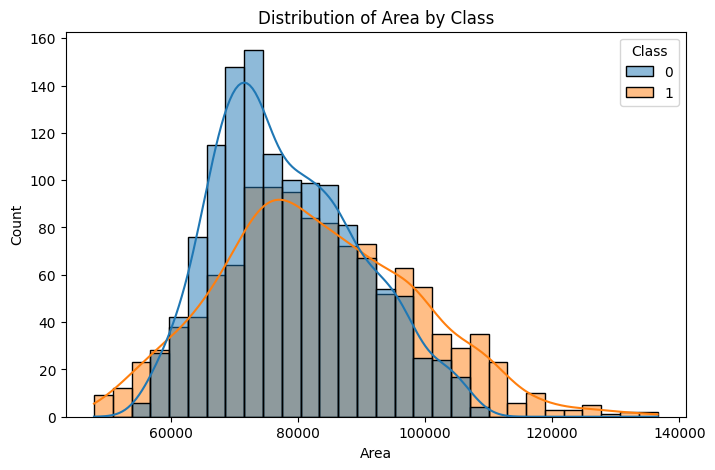

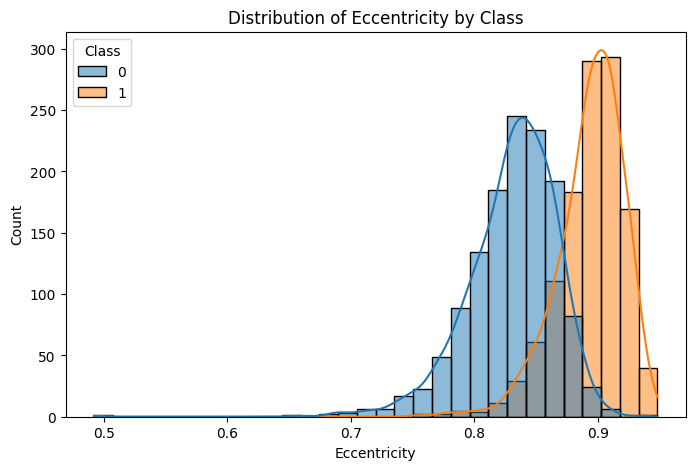

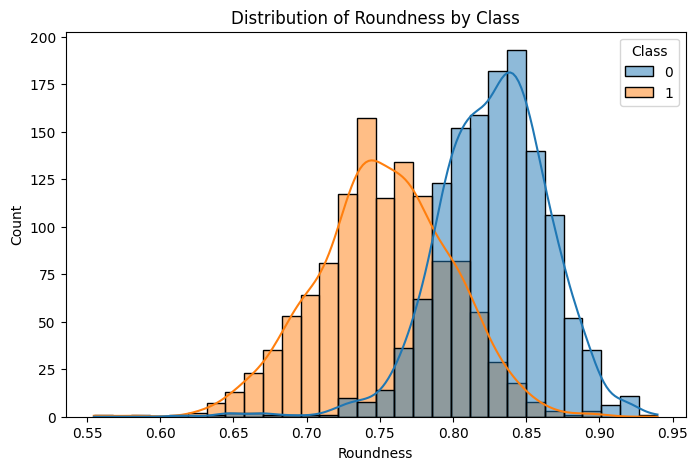

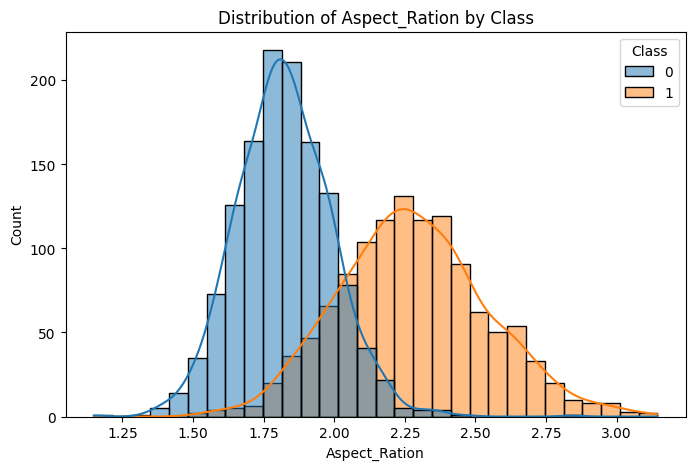

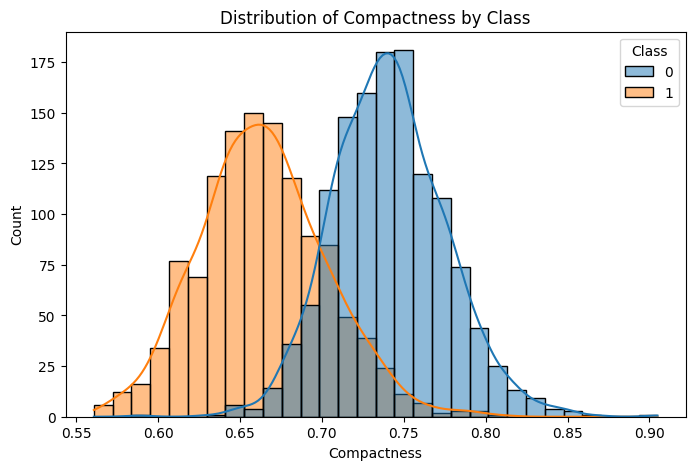

In [53]:
features = ['Area', 'Eccentricity', 'Roundness', 'Aspect_Ration', 'Compactness']
classes = data['Class']

# Visualize Feature Distributions
for feature in features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=data, x=feature, hue='Class', kde=True, bins=30)
    plt.title(f'Distribution of {feature} by Class')
    plt.show()

Based on the graphs above, each of the features shows varying degrees of separation between Class 0 (Cercevelik) and Class 1 (Urgup Sivrisi). Aspect Ratio, Roundness, and Eccentricity provide particularly clear distinctions, suggesting that these shape-related features are strong indicators for classifying the seeds. Compactness and Area also contribute to the separability but with a bit more overlap.

More specifically:

- <b> Area Distribution </b> <br>
Class 0 (Cercevelik) seeds generally have a lower area compared to Class 1 (Urgup Sivrisi) seeds, as indicated by the peak of the blue distribution on the left side of the plot.
There is some overlap between the two classes, but Class 1 (Urgup Sivrisi) seeds have a wider range of areas and tend to have higher values overall.<br><br>
- <b> Eccentricity Distribution </b> <br>
Class 0 (Cercevelik) seeds have a slightly lower eccentricity on average compared to Class 1 (Urgup Sivrisi) seeds. This suggests that Class 1 (Urgup Sivrisi) seeds are more elongated, while Class 0 (Cercevelik) seeds are closer to circular shapes.
The two classes are relatively well-separated in terms of eccentricity, indicating that this feature is useful for distinguishing between them.<br><br>
- <b> Roundness Distribution </b> <br>
Class 0 (Cercevelik) seeds generally have higher roundness values than Class 1 (Urgup Sivrisi) seeds, which supports the idea that Class 0 (Cercevelik) seeds are more circular.
There is a noticeable distinction between the two classes, with limited overlap. This suggests that roundness is a good feature for class differentiation.<br><br>
- <b> Aspect Ratio Distribution </b><br>
Class 0 (Cercevelik) seeds tend to have lower aspect ratios, indicating they are closer to being circular or evenly proportioned in length and width.
Class 1 (Urgup Sivrisi) seeds have higher aspect ratios, aligning with the description of them being more elongated.
This feature has a clear separation between classes, making it highly effective for distinguishing between Class 0 (Cercevelik) and Class 1 (Urgup Sivrisi).<br><br>
- <b> Compactness Distribution </b><br>
Class 0 (Cercevelik) seeds have a higher compactness than Class 1 (Urgup Sivrisi) seeds, indicating they are more similar in shape to a perfect circle with a given perimeter.
There is some overlap, but generally, the two classes show distinct peaks, suggesting that compactness can help in classification.

You can see how consistent the graphs are with the tables above as well. This gives us plausible key features to use in order to distinguish the two classes/seeds.

## 5c. Visual Comparison of Seeds via Drawing Measurements

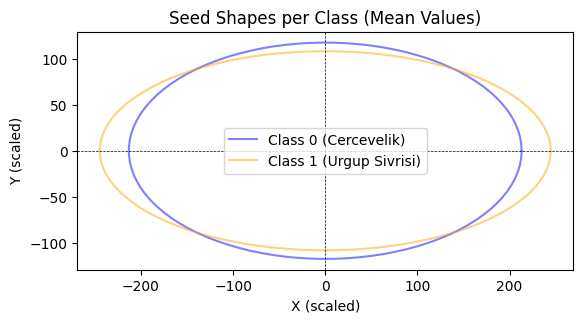

In [54]:
# Calculate the mean for each class
class0_major_axis = class0['Major_Axis_Length'].mean()
class0_minor_axis = class0['Minor_Axis_Length'].mean()

class1_major_axis = class1['Major_Axis_Length'].mean()
class1_minor_axis = class1['Minor_Axis_Length'].mean()

# Create the parametric points for the ovals
t = np.linspace(0, 2 * np.pi, 100)

# Oval for Class 0
x0 = (class0_major_axis / 2) * np.cos(t)
y0 = (class0_minor_axis / 2) * np.sin(t)
plt.plot(x0, y0, label='Class 0 (Cercevelik)', color='blue', alpha=0.5)

# Oval for Class 1
x1 = (class1_major_axis / 2) * np.cos(t)
y1 = (class1_minor_axis / 2) * np.sin(t)
plt.plot(x1, y1, label='Class 1 (Urgup Sivrisi)', color='orange', alpha=0.5)

# Add legends and labels
plt.title("Seed Shapes per Class (Mean Values)")
plt.xlabel("X (scaled)")
plt.ylabel("Y (scaled)")
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)
plt.gca().set_aspect('equal')  # Keep the aspect ratio equal
plt.legend()
plt.show()

## 5d. Correlation Analysis

In [55]:
df = pd.DataFrame(data)
numerical_columns = df.select_dtypes(include=['float64', 'int64', 'int32'])

correlation_matrix = numerical_columns.corr()
correlation_matrix

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
Area,1.000000,0.928548,0.789133,0.685304,0.999806,0.998464,0.159624,0.158388,-0.014018,-0.149378,0.159960,-0.160438,0.170280
Perimeter,0.928548,1.000000,0.946181,0.392913,0.929971,0.928055,0.464601,0.065340,-0.140600,-0.500968,0.487880,-0.484440,0.388345
Major_Axis_Length,0.789133,0.946181,1.000000,0.099376,0.789061,0.787078,0.704287,0.119291,-0.214990,-0.684972,0.729156,-0.726958,0.561458
Minor_Axis_Length,0.685304,0.392913,0.099376,1.000000,0.685634,0.690020,-0.590877,0.090915,0.233576,0.558566,-0.598475,0.603441,-0.401362
Convex_Area,0.999806,0.929971,0.789061,0.685634,1.000000,0.998289,0.159156,0.139178,-0.015449,-0.153615,0.159822,-0.160432,0.168029
Equiv_Diameter,0.998464,0.928055,0.787078,0.690020,0.998289,1.000000,0.156246,0.159454,-0.010970,-0.145313,0.155762,-0.156411,0.160303
Eccentricity,0.159624,0.464601,0.704287,-0.590877,0.159156,0.156246,1.000000,0.043991,-0.327316,-0.890651,0.950225,-0.981689,0.699319
Solidity,0.158388,0.065340,0.119291,0.090915,0.139178,0.159454,0.043991,1.000000,0.067537,0.200836,0.026410,-0.019967,0.122674
Extent,-0.014018,-0.140600,-0.214990,0.233576,-0.015449,-0.010970,-0.327316,0.067537,1.000000,0.352338,-0.329933,0.336984,-0.236076
Roundness,-0.149378,-0.500968,-0.684972,0.558566,-0.153615,-0.145313,-0.890651,0.200836,0.352338,1.000000,-0.935233,0.933308,-0.669514


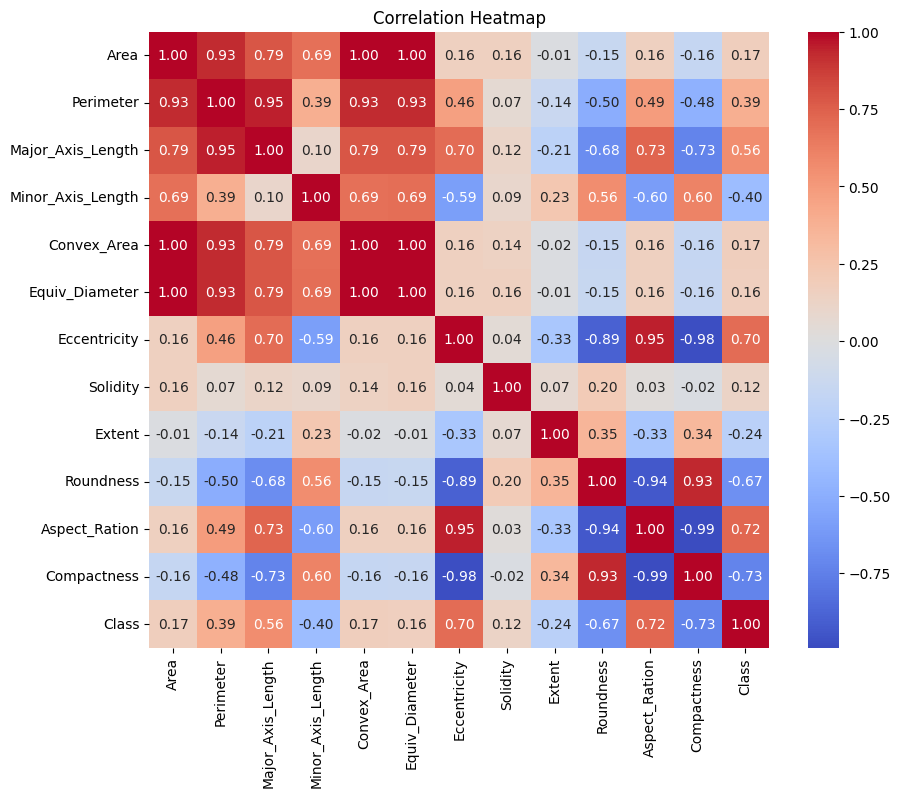

In [56]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

`Area`, `Convex_Area`, and `Equiv_Diameter` are highly correlated with each other (correlation close to 1). This is expected since these features are directly related to the size of the seed. Because they capture very similar information, including all these features in a model might lead to redundancy. Hence, it may be sufficient to keep just one of these in a model.

`Perimeter` has a strong correlation with `Major_Axis_Length` (correlation of 0.95), suggesting that larger perimeter values are associated with greater major axis lengths. This also indicates some redundancy, as these features may be measuring similar aspects of seed size and shape.

The Shape-related features show strong correlations with each other:
- `Eccentricity` and `Aspect_Ration` have a high positive correlation (0.95), meaning as eccentricity increases, so does the aspect ratio, which aligns with elongated shapes.
- `Eccentricity` and `Compactness` have a strong negative correlation (-0.98), indicating that more eccentric shapes (more elongated) have lower compactness.
- `Roundness` is also strongly correlated with `Aspect_Ration` (-0.94) and `Compactness` (0.93), showing that rounder seeds have a lower aspect ratio and higher compactness.

Given the high correlations among `Eccentricity`, `Aspect_Ration`, and `Compactness`, it may be another thing to consider by just choosing one or two of these to avoid redundancy.


`Solidity` and `Extent` have generally low correlations with other features, meaning they may capture unique aspects of seed shape or compactness that are not covered by other features.

In addition, features such as the `Eccentricity` and `Aspect_Ration` show a strong positive correlation with the target class while `Roundness`, `Compactness` show a strong negative correlation. Moreover, `Major_Axis_Length` shows a moderate positive correlation while `Minor_Axis_Length` shows a moderate `negative correlation` meaning both have a noticeable impact but may require other features or interactions for better prediction.

## 5e. Pairwise Scatter Plots
Based on the Pairwise Scatter Plots below, the features `Eccentricity`, `Roundness`, and `Aspect_Ration` show strong separability between Class 0 (Cercevelik) and Class 1 (Urgup Sivrisi), making them effective for classification. `Compactness` and `Area` also contribute to separability but to a lesser extent. The combination of shape-related features (like `Eccentricity`, `Roundness`, and `Aspect_Ration`) appears to be especially valuable for distinguishing the two classes, suggesting that shape is a more defining factor for classification than size.

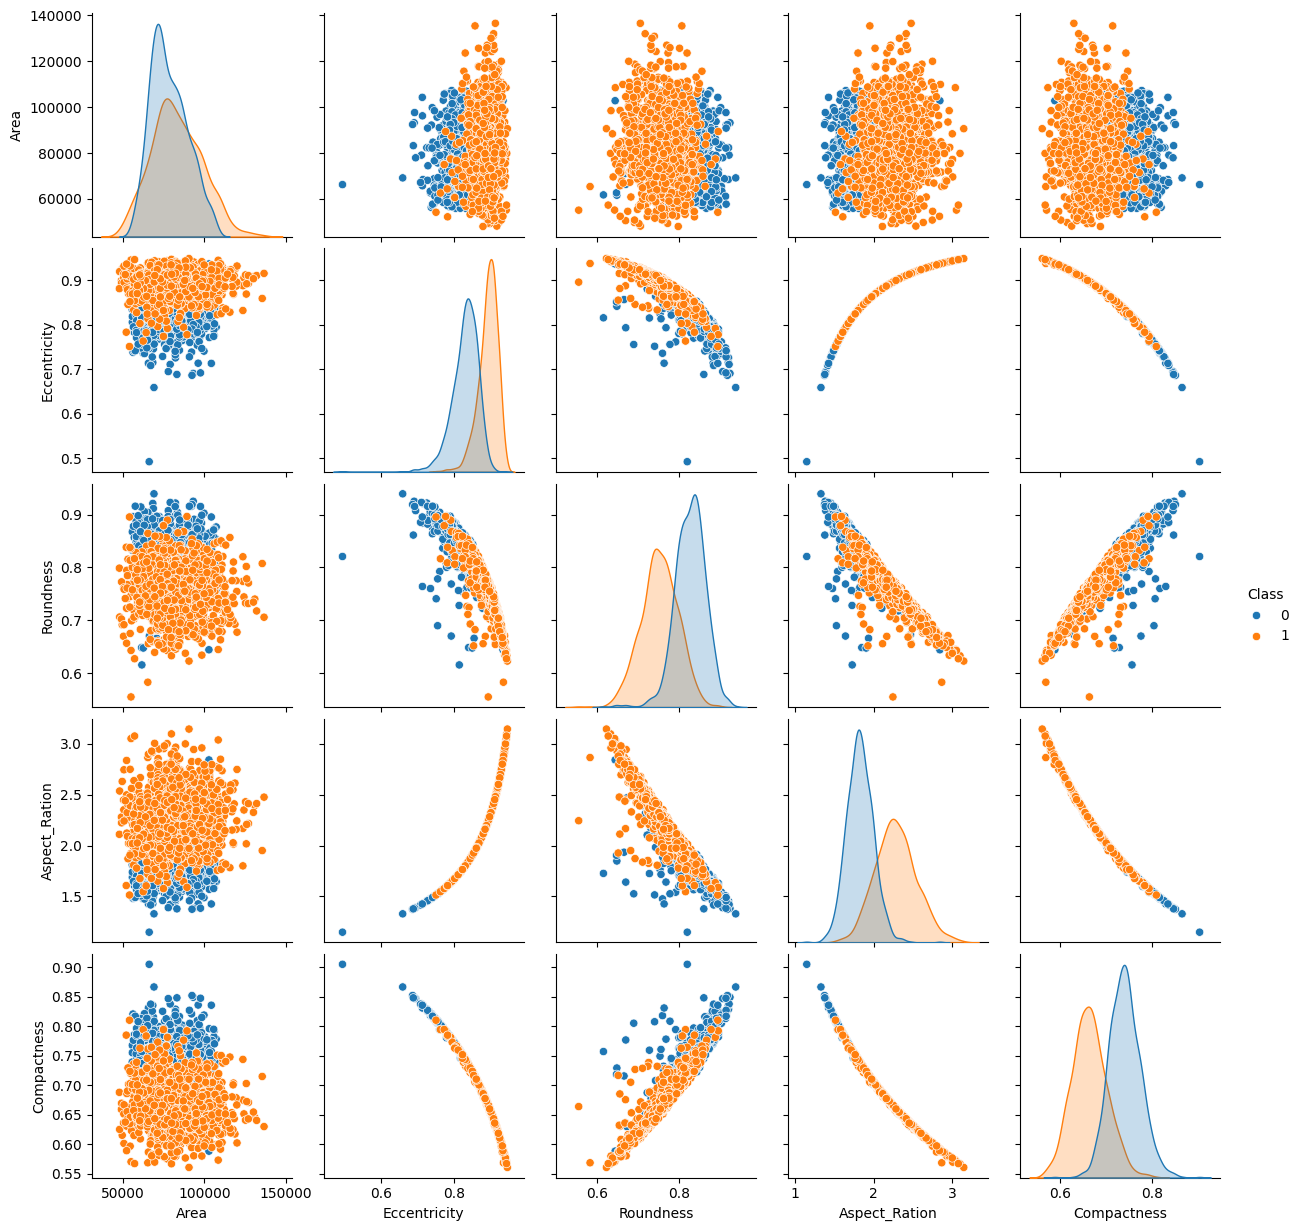

In [57]:
# Pairwise Scatter Plots
sns.pairplot(df[features + ['Class']], hue='Class', diag_kind='kde', height=2.5)
plt.show()

## 5f. Principal Component Analysis
The PCA (Principal Component Analysis) plot provides a two-dimensional representation of the data by reducing the features to two principal components (PCA1 and PCA2), which capture the most variance in the dataset.

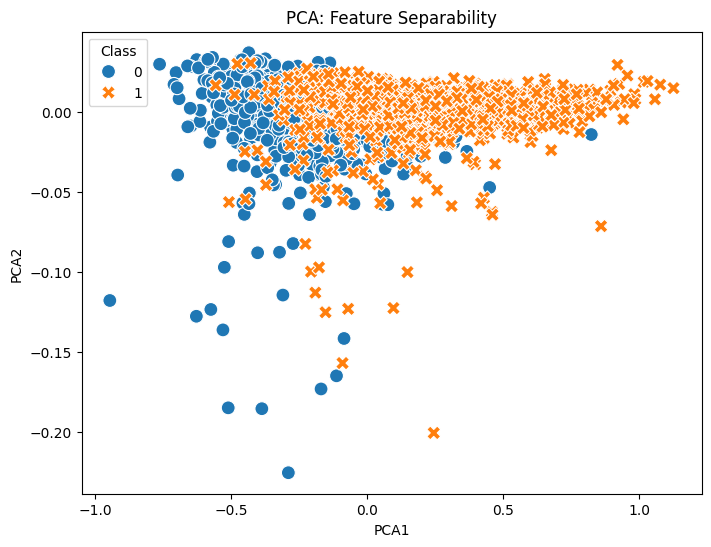

In [58]:
# Dimensionality Reduction
features = ['Eccentricity', 'Roundness', 'Aspect_Ration', 'Compactness']

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[features])
df['PCA1'], df['PCA2'] = pca_result[:, 0], pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Class', style='Class', s=100)
plt.title('PCA: Feature Separability')
plt.show()

In [59]:
components = pca.components_
feature_contributions = pd.DataFrame(components.T, index=features, columns=[
                                     f'PC{i+1}' for i in range(len(components))])

# Check absolute contributions of features to the first few principal components
print("Feature Contributions:")
print(feature_contributions)

feature_importance = feature_contributions.abs().sum(
    axis=1).sort_values(ascending=False)
print("\nFeature Importance (Summed Across PCs):")
print(feature_importance)

Feature Contributions:
                    PC1       PC2
Eccentricity   0.131458  0.007248
Roundness     -0.160338  0.985616
Aspect_Ration  0.964966  0.166967
Compactness   -0.160783  0.025124

Feature Importance (Summed Across PCs):
Roundness        1.145953
Aspect_Ration    1.131934
Compactness      0.185907
Eccentricity     0.138706
dtype: float64


`Eccentricity`, `Roundness`, `Aspect_Ration`, and `Compactness` are moderately effective at distinguishing Class 0 (Cercevelik) and Class 1 (Urgup Sivrisi), as seen by the general clustering of each class on opposite sides of PCA1. However, due to the overlap in the middle, these features alone may not perfectly separate the classes. Including additional features (such as `Area`) or exploring non-linear methods might further enhance separability.

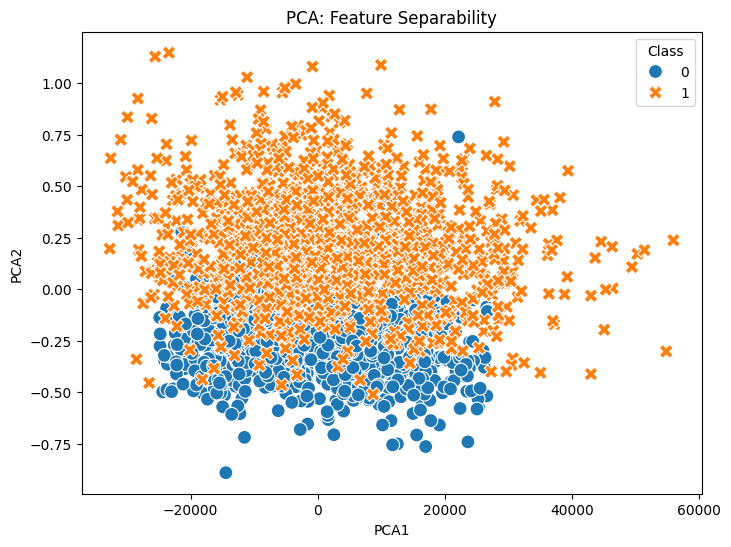

In [60]:
# Dimensionality Reduction
features = ['Area','Eccentricity', 'Roundness', 'Aspect_Ration', 'Compactness']

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[features])
df['PCA1'], df['PCA2'] = pca_result[:, 0], pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Class', style='Class', s=100)
plt.title('PCA: Feature Separability')
plt.show()

In [61]:
components = pca.components_
feature_contributions = pd.DataFrame(components.T, index=features, columns=[
                                     f'PC{i+1}' for i in range(len(components))])

# Check absolute contributions of features to the first few principal components
print("Feature Contributions:")
print(feature_contributions)

feature_importance = feature_contributions.abs().sum(
    axis=1).sort_values(ascending=False)
print("\nFeature Importance (Summed Across PCs):")
print(feature_importance)

Feature Contributions:
                        PC1       PC2
Area           1.000000e+00 -0.000004
Eccentricity   5.276291e-07  0.131299
Roundness     -6.113488e-07 -0.160364
Aspect_Ration  3.699135e-06  0.964990
Compactness   -6.230712e-07 -0.160740

Feature Importance (Summed Across PCs):
Area             1.000004
Aspect_Ration    0.964994
Compactness      0.160741
Roundness        0.160365
Eccentricity     0.131299
dtype: float64


Adding `Area` to the set of features (alongside `Eccentricity`, `Roundness`, `Aspect_Ration`, and `Compactness`) has improved the separability of the Class 0 (Cercevelik) and Class 1 (Urgup Sivrisi) classes in the PCA plot. This suggests that both size (represented by Area) and shape-related features are important for distinguishing these classes effectively. The improvement in separability implies that a classification model trained on this combination of features would likely perform better than one trained without Area.


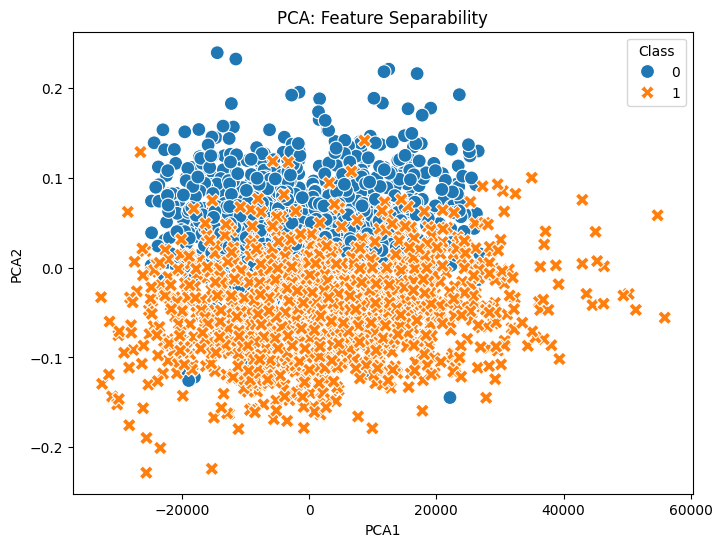

In [62]:
# Dimensionality Reduction
features = ['Area','Eccentricity', 'Roundness']

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[features])
df['PCA1'], df['PCA2'] = pca_result[:, 0], pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Class', style='Class', s=100)
plt.title('PCA: Feature Separability')
plt.show()

In [63]:
components = pca.components_
feature_contributions = pd.DataFrame(components.T, index=features, columns=[
                                     f'PC{i+1}' for i in range(len(components))])

# Check absolute contributions of features to the first few principal components
print("Feature Contributions:")
print(feature_contributions)

feature_importance = feature_contributions.abs().sum(
    axis=1).sort_values(ascending=False)
print("\nFeature Importance (Summed Across PCs):")
print(feature_importance)

Feature Contributions:
                       PC1           PC2
Area          1.000000e+00  8.066823e-07
Eccentricity  5.276291e-07 -6.175441e-01
Roundness    -6.113488e-07  7.865363e-01

Feature Importance (Summed Across PCs):
Area            1.000001
Roundness       0.786537
Eccentricity    0.617545
dtype: float64


`Area`, `Eccentricity`, and `Roundness` are effective at distinguishing Class 0 (Cercevelik) and Class 1 (Urgup Sivrisi), showing a clear seperation along PCA2. The removal of `Aspect_Ration` and `Compactness` provided a cleaner seperation of the two classes, and reduced the noise. This suggests that both size (represented by Area), and shape-related features are important for distinguishing these classes. However, there is still room for improvement as some overlap still exists.

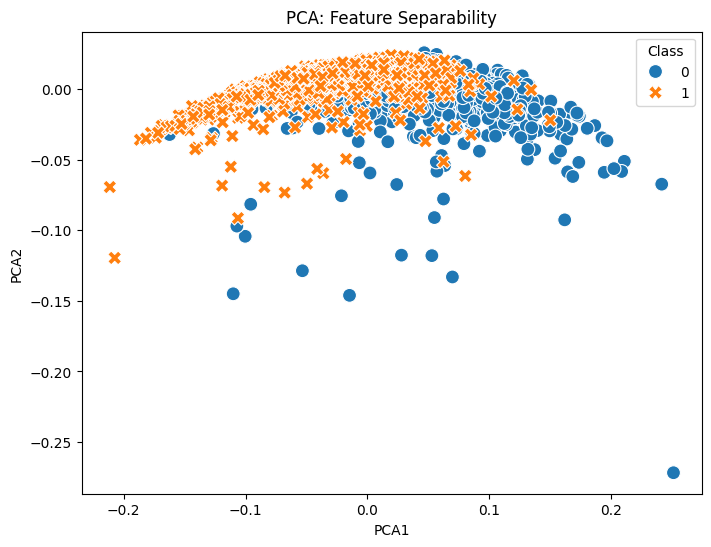

In [64]:
# Dimensionality Reduction
features = ['Eccentricity', 'Roundness']

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[features])
df['PCA1'], df['PCA2'] = pca_result[:, 0], pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Class', style='Class', s=100)
plt.title('PCA: Feature Separability')
plt.show()

In [65]:
components = pca.components_
feature_contributions = pd.DataFrame(components.T, index=features, columns=[
                                     f'PC{i+1}' for i in range(len(components))])

# Check absolute contributions of features to the first few principal components
print("Feature Contributions:")
print(feature_contributions)

feature_importance = feature_contributions.abs().sum(
    axis=1).sort_values(ascending=False)
print("\nFeature Importance (Summed Across PCs):")
print(feature_importance)

Feature Contributions:
                   PC1       PC2
Eccentricity -0.618502  0.785783
Roundness     0.785783  0.618502

Feature Importance (Summed Across PCs):
Eccentricity    1.404285
Roundness       1.404285
dtype: float64


`Eccentricity` and `Roundness` are effective at distinguishing Class 0 (Cercevelik) and Class 1 (Urgup Sivrisi), showing clear separation along PCA2. The removal of `Area`, `Aspect_Ratio`, and `Compactness` simplified the feature set while maintaining meaningful class separation. This suggests that shape-related features, particularly Eccentricity and Roundness, play a key role in distinguishing these classes.

# Section 6. Initial Model Training

In this section, we perform the initial model training to try to identify the underlying patterns in the dataset. **k-Nearest Neighbors (kNN), Logistic Regression, and Naive Bayes** are the three models chosen to perform the classification task of identifying the type of pumpkin seed.

### Feature Selection

Based on the Exploratory Data Analysis findings, features such as `Eccentricity`, `Aspect_Ration`, `Roundness`, and `Compactness` have a strong correlation to the target class so these are highly predictive of the target class and can be used as features when fed to the model. In addition, features with moderate correlation with the target class such as the `Major_Axis_Length` and the `Minor_Axis_Length` may also be used since both may help predict the target class when combined with the features with strong correlation. Lastly, based on the PCA output, `Area` can also be added as it has improved the seperability of the target class when combined with `Eccentricity`, `Aspect_Ration`, `Roundness`, and `Compactness`.

In [66]:
# Feature and Target Selection
features = data[['Eccentricity', 'Aspect_Ration', 'Roundness', 'Compactness', 'Major_Axis_Length',  'Minor_Axis_Length', 'Area']]
target = data['Class']

# Feature and Target Selection
features_nn = data.drop(columns=['Class'])  # All columns except 'Class'
target_nn = data['Class']  # The target column


### Splitting of Training and Testing Data

In [67]:
X = features
y = target
X_nn = features_nn
y_nn = target_nn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_nn, X_test_nn, y_train_nn, y_test_nn = train_test_split(X_nn, y_nn, test_size=0.2, random_state=42)

### Feature Scaling

Feature Scaling is the act of standardizing or normalizing the range of features in the dataset. This is done as kNN, Logistic Regression and Neural Networks are sensitive to the magnitude of feature values. If features were kept as is, having different scales, these models may prioritize larger valued features, and ignore the small ones. In our dataset, most of the size features could easily overthrow the shape features.

In [68]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled_nn = scaler.fit_transform(X_train_nn)
X_test_scaled_nn = scaler.transform(X_test_nn)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_train_scaled_nn = pd.DataFrame(X_train_scaled_nn, columns=X_train_nn.columns, index=X_train_nn.index)

X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)
X_test_scaled_nn = pd.DataFrame(X_test_scaled_nn, columns=X_test_nn.columns, index=X_test_nn.index)

### k-Nearest Neighbors (kNN) Model Training

K-Nearest Neighbors (KNN) is a simple machine learning model with relitvely high interpretability. The model makes no prior assumptions about the data distribution and its outputs are easily interpretable. KNN's predictions are made based on the class majority of the closest neighbors. The closest neighbors is a hyperparameter `n_neighbors`, which by default is set to three. Having a smaller number of neighbores makes the model less sensitive to noise, while having a higher value gives a clearer decision boundary.  


To measure the distance between the datapoints, KNN uses the _Eucledian distance_ by default. Other distance metrics could be used such as but not limited to the _Minowski distance_, _Manhattan distance_, and the _Jaccard distance_. The _Eucledian distance_ will be used in this model, since the scaled data can have negative values, making the _Minowski distance_ unusable. 


The default weight setting of the model is `uniform` making all neighbors contribute equally to the prediction. 


To tune this model we need to find the best value for `n_neighbors`. The best way to do this is by using the elbow method.

We chose kNN as the model excels in identify local patterns and boundaries, which is great as the 2 different classes seem to have a concise difference. This is also good with a small set of features, which we may do at the latter part of the paper as shown by the PCA results. Also it is simple to implement, and we wanted to show how a simple model would perform beside the 2 models.


In [69]:
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y_train)

model_knn_scaled = KNeighborsClassifier(n_neighbors=3)
model_knn_scaled.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

### Logistic Regression Model Training

Logistic Regression is designed for binary classification tasks, perfect for this tak. This model predicts the probability for the target class using a _sigmoid function_. This model assumes that there is a linear relationship between the features and the log-probability of the target classes. The `regularization rate` is a hyperparameter which is used to mitigate overfitting. By default, the _L2_ regularization is applied, which penalizes inputs with large coefficients. This helps keep the model more generalized.

To control the regularization, another hyperparameter `c` handles the penalty for regularization. By default, this value is set to `1.0`. Increasing this value results to a more flexible model, while decreasing this value makes the model more stiff.

This model was chosen as its very simple and straightforward to implement, like kNN, but this time, it is able to assign weights to important features. This is essential as found in the PCA results that `Eccentricity` and `Roundness` do really well in seperation. Ultimately, this model is really good with binary classification, perfect for classifying the two seeds. 


In [70]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

model_lr_scaled = LogisticRegression()
model_lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression()

### Neural Networks Model Training

Neural Networks is a highly flexible model which can capture complex and non-linear relationships between the data. It performs well on datasets with large number of features or high-dimensionality. 
The output layer for this can be set into _Sigmoid_ which is the same function used in Logistic Regression.

The number of hidden layers and neurons of the network is one of this model's hyperparameters. The number of hidden layers and neurons depends on the complexity of the data and the patterns it needs to capture.

Another important hyperparameter is the activation function used in the hidden layers. The _ReLU_ (Rectified Linear Unit) activation function is commonly chosen for hidden layers due to its efficiency and ability to introduce non-linearity into the model, allowing it to capture complex patterns. The Sigmoid activation function, used in the output layer, is ideal for binary classification as it outputs a probability score between 0 and 1, making it easy to threshold for binary decisions.

The optimizer used to train the neural network is another critical hyperparameter. For this task, the _Adam optimizer_ is chosen, which combines the advantages of both _RMSprop_ and _Stochastic Gradient Descent (SGD)_. It adapts the learning rate dynamically during training, ensuring faster and more stable convergence. The initial learning rate is set to `0.001`, which is a common default that provides a balance between convergence speed and stability.

To prevent overfitting, regularization is applied using an _L2 penalty_ (weight decay) with a strength parameter (alpha) of `0.0001`. This ensures that the model does not assign excessive importance to any single feature, helping to generalize better to unseen data. Additionally, early stopping can be used during training to halt the process when the model’s performance on a validation set stops improving, avoiding unnecessary epochs and overfitting.

The batch size controls the number of samples processed before updating the model parameters. A batch size of 32 is commonly used as it provides a good balance between memory efficiency and convergence speed. Finally, the model is trained for a maximum of 100 epochs, although early stopping can terminate the training earlier if the validation loss plateaus.

This was chosen as our last model as it is very flexible and can learn interactions between features. We would also want to see how a complex model can fare with a simple dataset.

In [71]:
model_nn = MLPClassifier(
    hidden_layer_sizes=(8, ),
    activation='relu',
    alpha=0.0001,
    learning_rate_init=0.001,
    max_iter=100,
    random_state=42)
model_nn.fit(X_train_nn, y_train_nn)

model_nn_scaled = MLPClassifier(
    hidden_layer_sizes=(8, ),
    activation='relu',
    alpha=0.0001,
    learning_rate_init=0.001,
    max_iter=100,
    random_state=42)
model_nn_scaled.fit(X_train_scaled_nn, y_train_nn)

c:\Users\jaced\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(8,), max_iter=100, random_state=42)

## Section 7. Error Analysis

## kNN Performance


### Unscaled

In [72]:
# Training Set
y_pred_knn_train_unscaled = model_knn.predict(X_train)
print('KNN Model (Unscaled - Training Set)')
print(classification_report(y_train, y_pred_knn_train_unscaled))

cm = confusion_matrix(y_train, y_pred_knn_train_unscaled)
cm = pd.DataFrame(
    cm,
    index=["Actual 0", "Actual 1"],
    columns=["Predicted 0", "Predicted 1"]
)
print("Confusion Matrix for KNN (Unscaled - Training Set):")
print(cm)
print("\n\n")

# Test Set
y_pred_knn_test_unscaled = model_knn.predict(X_test)
print('KNN Model (Unscaled - Test Set)')
print(classification_report(y_test, y_pred_knn_test_unscaled))

cm = confusion_matrix(y_test, y_pred_knn_test_unscaled)
cm = pd.DataFrame(
    cm,
    index=["Actual 0", "Actual 1"], 
    columns=["Predicted 0", "Predicted 1"]
)
print("Confusion Matrix for KNN (Unscaled - Test Set):")
print(cm)

KNN Model (Unscaled - Training Set)
              precision    recall  f1-score   support

           0       0.88      0.91      0.90      1049
           1       0.90      0.87      0.88       951

    accuracy                           0.89      2000
   macro avg       0.89      0.89      0.89      2000
weighted avg       0.89      0.89      0.89      2000

Confusion Matrix for KNN (Unscaled - Training Set):
          Predicted 0  Predicted 1
Actual 0          956           93
Actual 1          127          824



KNN Model (Unscaled - Test Set)
              precision    recall  f1-score   support

           0       0.66      0.73      0.69       251
           1       0.69      0.62      0.65       249

    accuracy                           0.67       500
   macro avg       0.68      0.67      0.67       500
weighted avg       0.68      0.67      0.67       500

Confusion Matrix for KNN (Unscaled - Test Set):
          Predicted 0  Predicted 1
Actual 0          183           68


### Scaled

In [73]:
# Training Set
y_pred_knn_train_scaled = model_knn_scaled.predict(X_train_scaled)
print('KNN Model (Scaled - Training Set)')
print(classification_report(y_train, y_pred_knn_train_scaled))

cm = confusion_matrix(y_train, y_pred_knn_train_scaled)
cm = pd.DataFrame(
    cm,
    index=["Actual 0", "Actual 1"],
    columns=["Predicted 0", "Predicted 1"]
)
print("Confusion Matrix for KNN (Scaled - Training Set):")
print(cm)
print("\n\n")

# Test Set
y_pred_knn_test_scaled = model_knn_scaled.predict(X_test_scaled)
print('KNN Model (Scaled - Test Set)')
print(classification_report(y_test, y_pred_knn_test_scaled))

cm = confusion_matrix(y_test, y_pred_knn_test_scaled)
cm = pd.DataFrame(
    cm,
    index=["Actual 0", "Actual 1"],
    columns=["Predicted 0", "Predicted 1"]
)
print("Confusion Matrix for KNN (Scaled - Test Set):")
print(cm)

KNN Model (Scaled - Training Set)
              precision    recall  f1-score   support

           0       0.90      0.94      0.92      1049
           1       0.93      0.89      0.91       951

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000

Confusion Matrix for KNN (Scaled - Training Set):
          Predicted 0  Predicted 1
Actual 0          990           59
Actual 1          106          845



KNN Model (Scaled - Test Set)
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       251
           1       0.87      0.83      0.85       249

    accuracy                           0.85       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.85      0.85      0.85       500

Confusion Matrix for KNN (Scaled - Test Set):
          Predicted 0  Predicted 1
Actual 0          219           32
Actual 1

In [74]:
# Accuracy Scores for Training and Test Sets

# Unscaled
knn_train_acc_us = accuracy_score(y_train, y_pred_knn_train_unscaled)
knn_test_acc_us = accuracy_score(y_test, y_pred_knn_test_unscaled)
print(f"kNN Training Accuracy: {knn_train_acc_us * 100:.2f}%")
print(f"kNN Test Accuracy: {knn_test_acc_us * 100:.2f}%")

# Scaled
knn_train_acc_s = accuracy_score(y_train, y_pred_knn_train_scaled)
knn_test_acc_s = accuracy_score(y_test, y_pred_knn_test_scaled)
print(f"kNN Training Accuracy (Scaled): {knn_train_acc_s * 100:.2f}%")
print(f"kNN Test Accuracy (Scaled): {knn_test_acc_s * 100:.2f}%")

kNN Training Accuracy: 89.00%
kNN Test Accuracy: 67.40%
kNN Training Accuracy (Scaled): 91.75%
kNN Test Accuracy (Scaled): 85.20%


Scaling had a significant positive impact on the KNN model's performance. When the data was scaled, both training and test accuracies improved substantially, with the training accuracy increasing from 89.00% to 91.75% and the test accuracy jumping from 67.40% to 85.20%. Additionally, precision, recall, and F1-scores for both classes were higher with the scaled data, highlighting the importance of feature scaling for models like KNN, which rely on distance metrics for predictions.

The unscaled model exhibited signs of overfitting, as evidenced by the large gap between its training accuracy (89.00%) and test accuracy (67.40%). In contrast, the scaled model mitigated this issue, reducing the performance gap between training and test sets (91.75% vs. 85.20%). This indicates that scaling not only improved the model's accuracy but also enhanced its ability to generalize to unseen data.

Analyzing the confusion matrices further supports the effectiveness of scaling. The scaled model consistently had fewer misclassifications on both the training and test sets compared to the unscaled version. This demonstrates that scaling improves the model's ability to correctly classify instances, particularly in scenarios where features vary in magnitude. Overall, the results show that feature scaling is essential for achieving optimal performance with KNN models.

## Logistic Regression Performance

### Unscaled

In [75]:
# Logistic Regression Evaluation (Unscaled)
# Training Set
y_pred_lr_train_unscaled = model_lr.predict(X_train)
print('Logistic Regression Model (Unscaled - Training Set)')
print(classification_report(y_train, y_pred_lr_train_unscaled))

cm = confusion_matrix(y_train, y_pred_lr_train_unscaled)
cm = pd.DataFrame(
    cm,
    index=["Actual 0", "Actual 1"],
    columns=["Predicted 0", "Predicted 1"]
)
print("Confusion Matrix for Logistic Regression (Unscaled - Training Set):")
print(cm)
print("\n\n")


y_pred_lr_test_unscaled = model_lr.predict(X_test)
print('Logistic Regression Model (Unscaled - Test Set)')
print(classification_report(y_test, y_pred_lr_test_unscaled))

cm = confusion_matrix(y_test, y_pred_lr_test_unscaled)
cm = pd.DataFrame(
    cm,
    index=["Actual 0", "Actual 1"],
    columns=["Predicted 0", "Predicted 1"]
)
print("Confusion Matrix for Logistic Regression (Unscaled - Test Set):")
print(cm)
print("\n\n")

Logistic Regression Model (Unscaled - Training Set)
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1049
           1       0.89      0.85      0.87       951

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000

Confusion Matrix for Logistic Regression (Unscaled - Training Set):
          Predicted 0  Predicted 1
Actual 0          950           99
Actual 1          141          810



Logistic Regression Model (Unscaled - Test Set)
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       251
           1       0.85      0.81      0.83       249

    accuracy                           0.84       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.84      0.84      0.84       500

Confusion Matrix for Logistic Regression (Unscaled - Test Set):
      

### Scaled

In [76]:
# Training Set
y_pred_lr_scaled_train = model_lr_scaled.predict(X_train_scaled)
print('Logistic Regression Model (Scaled - Training Set)')
print(classification_report(y_train, y_pred_lr_scaled_train))

cm = confusion_matrix(y_train, y_pred_lr_scaled_train)
cm = pd.DataFrame(
    cm,
    index=["Actual 0", "Actual 1"],
    columns=["Predicted 0", "Predicted 1"]
)
print("Confusion Matrix for Logistic Regression (Scaled - Training Set):")
print(cm)
print("\n\n")

# Test Set
y_pred_lr_scaled_test = model_lr_scaled.predict(X_test_scaled)
print('Logistic Regression Model (Scaled - Test Set)')
print(classification_report(y_test, y_pred_lr_scaled_test))

cm = confusion_matrix(y_test, y_pred_lr_scaled_test)
cm = pd.DataFrame(
    cm,
    index=["Actual 0", "Actual 1"],
    columns=["Predicted 0", "Predicted 1"]
)
print("Confusion Matrix for Logistic Regression (Scaled - Test Set):")
print(cm)
print("\n\n")

Logistic Regression Model (Scaled - Training Set)
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      1049
           1       0.89      0.85      0.87       951

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000

Confusion Matrix for Logistic Regression (Scaled - Training Set):
          Predicted 0  Predicted 1
Actual 0          953           96
Actual 1          142          809



Logistic Regression Model (Scaled - Test Set)
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       251
           1       0.86      0.81      0.83       249

    accuracy                           0.84       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.84      0.84      0.84       500

Confusion Matrix for Logistic Regression (Scaled - Test Set):
          Pred

In [77]:
# Accuracy Scores for Training and Test Sets

# Unscaled
lr_train_acc_us = accuracy_score(y_train, y_pred_lr_train_unscaled)
lr_test_acc_us = accuracy_score(y_test, y_pred_lr_test_unscaled)
print(f"Logistic Regression Training Accuracy: {lr_train_acc_us * 100:.2f}%")
print(f"Logistic Regression: {lr_test_acc_us * 100:.2f}%")

# Scaled
lr_train_acc_s = accuracy_score(y_train, y_pred_lr_scaled_train)
lr_test_acc_s = accuracy_score(y_test, y_pred_lr_scaled_test)
print(f"Logistic Regression Training Accuracy (Scaled): {lr_train_acc_s * 100:.2f}%")
print(f"Logistic Regression Test Accuracy (Scaled): {lr_test_acc_s * 100:.2f}%")

Logistic Regression Training Accuracy: 88.00%
Logistic Regression: 83.60%
Logistic Regression Training Accuracy (Scaled): 88.10%
Logistic Regression Test Accuracy (Scaled): 84.00%


Scaling the features led to a slight improvement in the performance of the logistic regression model. While the training accuracy increased marginally from 87.90% to 88.05%, the test accuracy saw a more notable improvement from 82.60% to 84.00%. This indicates that scaling helps the model generalize better to unseen data, though the magnitude of the improvement is less dramatic compared to distance-based models like KNN.

The confusion matrices and classification reports provide deeper insights. For both the unscaled and scaled models, the training performance was relatively stable, with similar precision, recall, and F1-scores for both classes. However, the scaled model showed fewer misclassifications on the test set. For instance, the scaled test set confusion matrix shows a reduction in false positives and false negatives compared to the unscaled version, with only 33 Class 0 samples misclassified as Class 1 (down from 38) and 47 Class 1 samples misclassified as Class 0 (down from 49). These improvements suggest that scaling features contributes to slightly better boundary learning in the logistic regression model.

Despite the modest gains, the logistic regression model already performs consistently well regardless of scaling, achieving over 83% test accuracy in both cases. This is expected because logistic regression is less sensitive to feature scaling than KNN. However, scaling still enhances model stability and slightly boosts generalization performance, making it a good practice when working with datasets where feature magnitudes vary significantly.

## Neural Networks

### Unscaled

In [78]:
# Training Set
y_pred_nn_train_unscaled = model_nn.predict(X_train_nn)
print('Neural Network Model (Unscaled - Training Set)')
print(classification_report(y_train_nn, y_pred_nn_train_unscaled))

cm = confusion_matrix(y_train_nn, y_pred_nn_train_unscaled)
cm = pd.DataFrame(
    cm,
    index=["Actual 0", "Actual 1"],
    columns=["Predicted 0", "Predicted 1"]
)
print("Confusion Matrix for Neural Network (Unscaled - Training Set):")
print(cm)
print("\n\n")

# Test Set
y_pred_nn_test_unscaled = model_nn.predict(X_test_nn)
print('Neural Network Model (Unscaled - Test Set)')
print(classification_report(y_test_nn, y_pred_nn_test_unscaled))

cm = confusion_matrix(y_test_nn, y_pred_nn_test_unscaled)
cm = pd.DataFrame(
    cm,
    index=["Actual 0", "Actual 1"],
    columns=["Predicted 0", "Predicted 1"]
)
print("Confusion Matrix for Neural Network (Unscaled - Test Set):")
print(cm)
print("\n\n")

Neural Network Model (Unscaled - Training Set)
              precision    recall  f1-score   support

           0       0.52      1.00      0.69      1049
           1       0.50      0.00      0.00       951

    accuracy                           0.52      2000
   macro avg       0.51      0.50      0.35      2000
weighted avg       0.51      0.52      0.36      2000

Confusion Matrix for Neural Network (Unscaled - Training Set):
          Predicted 0  Predicted 1
Actual 0         1047            2
Actual 1          949            2



Neural Network Model (Unscaled - Test Set)
              precision    recall  f1-score   support

           0       0.50      1.00      0.67       251
           1       0.50      0.00      0.01       249

    accuracy                           0.50       500
   macro avg       0.50      0.50      0.34       500
weighted avg       0.50      0.50      0.34       500

Confusion Matrix for Neural Network (Unscaled - Test Set):
          Predicted 0  Pre

In [79]:
# Training Set
y_pred_nn_train_scaled = model_nn_scaled.predict(X_train_scaled_nn)
print('Neural Network Model (Scaled - Training Set)')
print(classification_report(y_train_nn, y_pred_nn_train_scaled))

cm = confusion_matrix(y_train_nn, y_pred_nn_train_scaled)
cm = pd.DataFrame(
    cm,
    index=["Actual 0", "Actual 1"],
    columns=["Predicted 0", "Predicted 1"]
)
print("Confusion Matrix for Neural Network (Scaled - Training Set):")
print(cm)
print("\n\n")

# Test Set
y_pred_nn_test_scaled = model_nn_scaled.predict(X_test_scaled_nn)
print('Neural Network Model (Scaled - Test Set)')
print(classification_report(y_test_nn, y_pred_nn_test_scaled))

cm = confusion_matrix(y_test_nn, y_pred_nn_test_scaled)
cm = pd.DataFrame(
    cm,
    index=["Actual 0", "Actual 1"],
    columns=["Predicted 0", "Predicted 1"]
)
print("Confusion Matrix for Neural Network (Scaled - Test Set):")
print(cm)
print("\n\n")

Neural Network Model (Scaled - Training Set)
              precision    recall  f1-score   support

           0       0.88      0.89      0.89      1049
           1       0.88      0.87      0.87       951

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000

Confusion Matrix for Neural Network (Scaled - Training Set):
          Predicted 0  Predicted 1
Actual 0          937          112
Actual 1          127          824



Neural Network Model (Scaled - Test Set)
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       251
           1       0.86      0.83      0.84       249

    accuracy                           0.85       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.85      0.85      0.85       500

Confusion Matrix for Neural Network (Scaled - Test Set):
          Predicted 0  Predicted 1

In [80]:
# Accuracy Scores for Training and Test Sets

# Unscaled
nn_train_acc_us = accuracy_score(y_train_nn, y_pred_nn_train_unscaled)
nn_test_acc_us = accuracy_score(y_test_nn, y_pred_nn_test_unscaled)
print(f"Neural Network Training Accuracy: {nn_train_acc_us * 100:.2f}%")
print(f"Neural Network Test Accuracy: {nn_test_acc_us * 100:.2f}%")

# Scaled
nn_train_acc_s = accuracy_score(y_train_nn, y_pred_nn_train_scaled)
nn_test_acc_s = accuracy_score(y_test_nn, y_pred_nn_test_scaled)
print(f"Neural Network Training Accuracy (Scaled): {nn_train_acc_s * 100:.2f}%")
print(f"Neural Network Test Accuracy (Scaled): {nn_test_acc_s * 100:.2f}%")

Neural Network Training Accuracy: 52.45%
Neural Network Test Accuracy: 50.20%
Neural Network Training Accuracy (Scaled): 88.05%
Neural Network Test Accuracy (Scaled): 84.80%


In [81]:
# TODO: Edit markdown below to match fixes done above

Feature scaling had a dramatic impact on the performance of the neural network model. Without scaling, the model performed poorly, with a training accuracy of 44.95% and a test accuracy of 45.40%. These results indicate that the neural network struggled to learn meaningful patterns from the unscaled features. The classification reports reveal that the unscaled model had high recall for Class 0 (80% for the training set and 85% for the test set), but very poor recall for Class 1 (7% for training and 5% for test). This imbalance suggests that the model was biased toward predicting Class 0, as evidenced by the high number of false negatives for Class 1 in the confusion matrices.


After scaling the features, the neural network's performance improved significantly. Training accuracy rose to 87.90%, and test accuracy increased to 83.00%. The scaled model demonstrated much better recall for Class 1 (85% for training and 80% for test), though it remained lower than the recall for Class 0 (96% for training and 94% for test). The precision for Class 1 also improved substantially (from 23% unscaled to 87% scaled on the training set and from 26% unscaled to 82% scaled on the test set). This improvement suggests that scaling allowed the neural network to better differentiate between the two classes and reduce its bias toward predicting Class 0.

The confusion matrices for the scaled model provide additional insights. For the test set, the number of correctly classified Class 0 instances increased (235 compared to 214 unscaled), while the number of correctly classified Class 1 instances also improved significantly (75 compared to just 13 unscaled). However, a considerable number of Class 1 instances were still misclassified as Class 0, indicating that while scaling improved performance, the model's ability to accurately classify Class 1 remains limited.

## Section 8. Improving model performance

### KNN Finding the Best Value for K

The goal for hyperparameter tuning for kNN is to find the optimal value for k. The evaluation metrics: accuracy, precision, recall, and F1-score, will be used to assess the impact of hyperparameter tuning. This segment will make use of `Grid Search` to find the best combination of hyper parameters. In this case we are just searching for the best value for `k` or the `n_neighbors` hyperparameter.    

`GridSearchCV` exhaustively tests the possible combinations for the hyper parameters set in `grid_params_knn` with a 10-fold cross validation. This ensures that the model is evaluatied on multiple subsets of the training data to try and mitigate the overfitting issues discovered in `section 7`

In [82]:
grid_params_knn = { 'n_neighbors': range(1, 10) }
grid_search_knn= GridSearchCV(KNeighborsClassifier(), grid_params_knn, cv=10)
grid_search_knn.fit(X_train_scaled, y_train)
print(f"Best Parameters GridSearch: {grid_search_knn.best_params_}")

Best Parameters GridSearch: {'n_neighbors': 8}


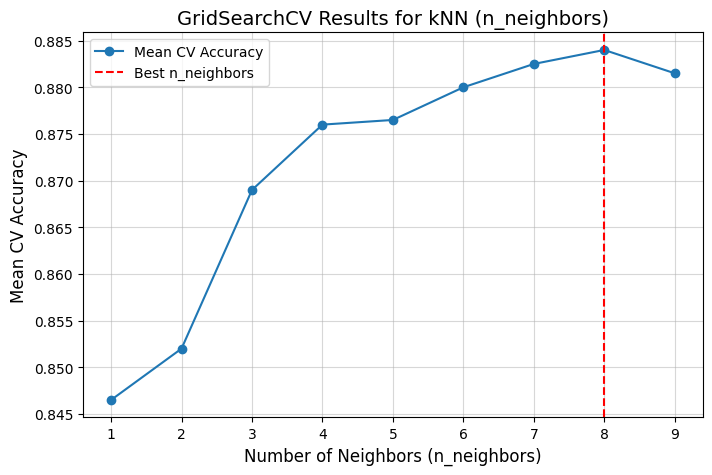

In [83]:
# Plotting the mean error for the test scores in relation to k over time

# Extracting the mean test scores for hyperparameter k
mean_test_scores = grid_search_knn.cv_results_['mean_test_score']
param_range = grid_params_knn['n_neighbors']
best_n_neighbors = grid_search_knn.best_params_['n_neighbors']

# Plotting the results
plt.figure(figsize=(8, 5))
plt.plot(param_range, mean_test_scores, marker='o', linestyle='-', label='Mean CV Accuracy')
plt.axvline(best_n_neighbors, color='red', linestyle='--', label='Best n_neighbors')
plt.title('GridSearchCV Results for kNN (n_neighbors)', fontsize=14)
plt.xlabel('Number of Neighbors (n_neighbors)', fontsize=12)
plt.ylabel('Mean CV Accuracy', fontsize=12)
plt.xticks(param_range)
plt.grid(alpha=0.5)
plt.legend()
plt.show()

In [84]:
model_knn_tuned = grid_search_knn.best_estimator_
model_knn_tuned.fit(X_train_scaled, y_train)
score_knn_tuned = model_knn_tuned.score(X_test_scaled, y_test)


In [85]:
print("Classification Report for tuned kNN:")
print(f"Test Accuracy: {score_knn_tuned * 100:.2f}%")
print(classification_report(y_test, model_knn_tuned.predict(X_test_scaled)))

Classification Report for tuned kNN:
Test Accuracy: 86.80%
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       251
           1       0.90      0.83      0.86       249

    accuracy                           0.87       500
   macro avg       0.87      0.87      0.87       500
weighted avg       0.87      0.87      0.87       500



In [86]:
score_knn_untuned = model_knn_scaled.score(X_test_scaled, y_test)

print(f"Test Accuracy for scaled KNN without tuning: {score_knn_untuned * 100:.2f}%")
print("Confusion Matrix for scaled kNN: without tuning")
print(classification_report(y_test, model_knn_scaled.predict(X_test_scaled)))

Test Accuracy for scaled KNN without tuning: 85.20%
Confusion Matrix for scaled kNN: without tuning
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       251
           1       0.87      0.83      0.85       249

    accuracy                           0.85       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.85      0.85      0.85       500



`GridSearchCV` identified that `8` is the best value for the number of neighbots. Using this, the knn model performance showed slight improvements in the model's accuracy. The model showed a `1.6% increase in accuracy`. Additionally, the model makes fewer `false positives` for class 1 and fewer `false negatives` for class 0. This indicates that the model is able to make fewer mistakes in classification. 

### Logistic Regression Finding the Best Value for 

The goal for `Logistic Regression` is to improve the model performance using `GridSearchCV`. The hyperparameters used are `penalty`, `C`, `solver`, and `max_iter`. Like what was done in the KNN segment of tuning, this segment will exhaustively go through the combinations of hyperparameters and return the best performing combination. The `penalty` parameter is the type of regularization to be used. In this case, `l2` is the only a parameters which works with the given solver. The `C` parameter is the regularization strength, this dictates how flexible the model can be. Having a smaller value will imply a stronger regularization, while a higher value leads to the opposite. By exploring values from (0.0001 to 10,000) we can try to find the best strength for regularization. The `solver` parameter is the optimization algorithms to be used. Finally, `max_iter` is the parameter for the number of iterations for convergence for the solver. 

In [87]:
params_lr = {
    'penalty': ['l2'],
    'C': np.logspace(-4, 4, 20),
    'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag'],
    'max_iter': [500, 1000, 1500, 2000]
}
grid_search_lr = GridSearchCV(LogisticRegression(), params_lr, cv=10, n_jobs=-1, verbose=2)
grid_search_lr.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 320 candidates, totalling 3200 fits


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'max_iter': [500, 1000, 1500, 2000], 'penalty': ['l2'],
                         'solver': ['lbfgs', 'newton-cg', 'liblinear', 'sag']},
             verbose=2)

In [88]:
print(f"Best Parameters GridSearch: {grid_search_lr.best_params_}")
print(f"Best Score GridSearch: {grid_search_lr.best_score_}")

Best Parameters GridSearch: {'C': 206.913808111479, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'sag'}
Best Score GridSearch: 0.8855000000000001


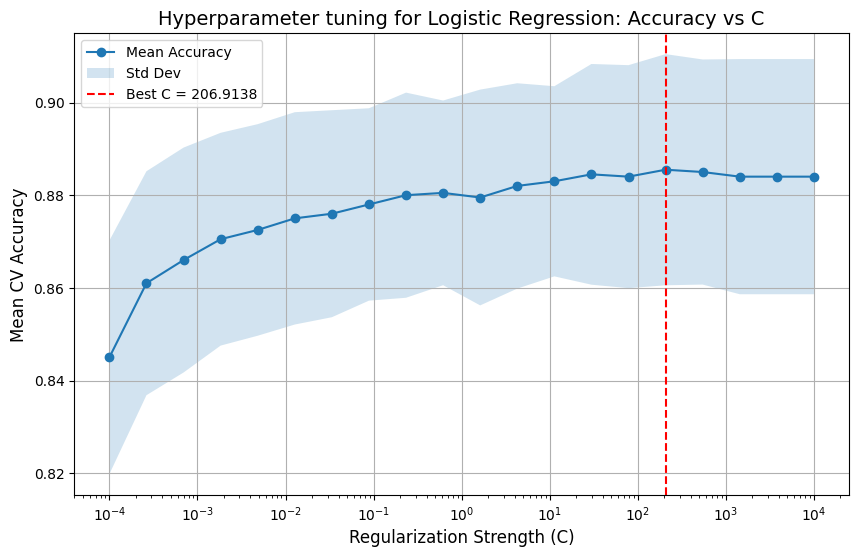

In [89]:
grid_results_lr = grid_search_lr.cv_results_

C_vals = params_lr['C']
best_C = grid_search_lr.best_params_['C']
mean_test_scores = grid_results_lr['mean_test_score']
std_test_scores = grid_results_lr['std_test_score']
selected_solver = 'sag'
selected_max_iter = 1000
filtered_scores = [
    mean_test_scores[i] for i in range(len(mean_test_scores))
    if grid_results_lr['param_solver'][i] == selected_solver
    and grid_results_lr['param_max_iter'][i] == selected_max_iter
]

filtered_std = [
    std_test_scores[i] for i in range(len(std_test_scores))
    if grid_results_lr['param_solver'][i] == selected_solver
    and grid_results_lr['param_max_iter'][i] == selected_max_iter
]

plt.figure(figsize=(10, 6))
plt.semilogx(C_vals, filtered_scores, marker='o', label='Mean Accuracy')
plt.fill_between(
    C_vals,
    np.array(filtered_scores) - np.array(filtered_std),
    np.array(filtered_scores) + np.array(filtered_std),
    alpha=0.2,
    label= 'Std Dev')
plt.axvline(x=best_C, color='red', linestyle='--', label=f'Best C = {best_C:.4f}')
plt.title('Hyperparameter tuning for Logistic Regression: Accuracy vs C', fontsize=14)
plt.xlabel('Regularization Strength (C)', fontsize=12)
plt.ylabel('Mean CV Accuracy', fontsize=12)
plt.legend()
plt.grid()
plt.show()


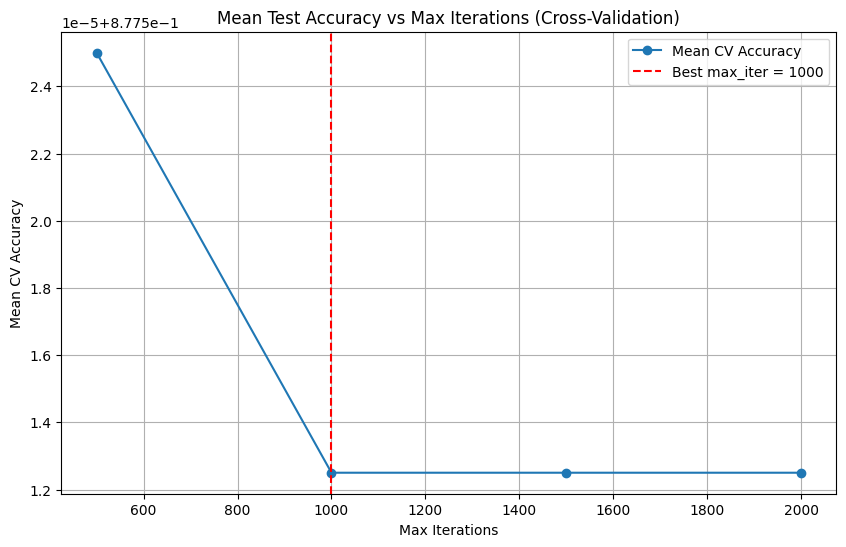

In [90]:
# Extract mean test scores for `max_iter`
max_iter_values = params_lr['max_iter']
best_max_iter = grid_search_lr.best_params_['max_iter']
mean_test_scores_max_iter = [
    np.mean([
        mean_test_scores[i] for i in range(len(mean_test_scores))
        if grid_results_lr['param_max_iter'][i] == max_iter
    ])
    for max_iter in max_iter_values
]

# Plot accuracy vs. max_iter
plt.figure(figsize=(10, 6))
plt.plot(max_iter_values, mean_test_scores_max_iter, marker='o', label='Mean CV Accuracy')
plt.axvline(x=best_max_iter, color='red', linestyle='--', label=f'Best max_iter = {best_max_iter}')
plt.title("Mean Test Accuracy vs Max Iterations (Cross-Validation)")
plt.xlabel("Max Iterations")
plt.ylabel("Mean CV Accuracy")
plt.legend()
plt.grid()
plt.show()


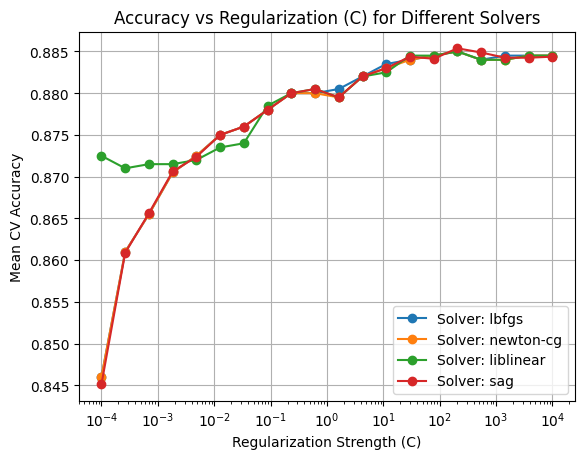

In [91]:
import matplotlib.pyplot as plt
import numpy as np

# Define specific solvers and ensure results are grouped by C
solvers = params_lr['solver']

# Loop through each solver
for solver in solvers:
    # Filter for the current solver
    filtered_scores_solver = [
        np.mean([
            mean_test_scores[i]
            for i in range(len(mean_test_scores))
            if grid_results_lr['param_solver'][i] == solver
            and grid_results_lr['param_C'][i] == C
        ])
        for C in C_vals
    ]

    # Plot the accuracy for each solver
    plt.semilogx(C_vals, filtered_scores_solver, marker='o', label=f'Solver: {solver}')

# Add labels and legend
plt.title("Accuracy vs Regularization (C) for Different Solvers")
plt.xlabel("Regularization Strength (C)")
plt.ylabel("Mean CV Accuracy")
plt.legend()
plt.grid()
plt.show()


In [92]:
model_lr_tuned = grid_search_lr.best_estimator_
model_lr_tuned.fit(X_train_scaled, y_train)
score_lr_tuned = model_lr_tuned.score(X_test_scaled, y_test)

In [93]:
print("Classification Report for tuned logistic regression:")
print(f"Test Accuracy: {score_lr_tuned * 100:.2f}%")
print(classification_report(y_test, model_lr_tuned.predict(X_test_scaled)))

Classification Report for tuned logistic regression:
Test Accuracy: 85.40%
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       251
           1       0.87      0.84      0.85       249

    accuracy                           0.85       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.85      0.85      0.85       500



In [94]:
score_lr_untuned = model_lr_scaled.score(X_test_scaled, y_test)

print("Confusion Matrix for scaled logistic regression: without tuning")
print(f"Test Accuracy: {score_lr_untuned * 100:.2f}%")
print(classification_report(y_test, model_lr_scaled.predict(X_test_scaled)))

Confusion Matrix for scaled logistic regression: without tuning
Test Accuracy: 84.00%
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       251
           1       0.86      0.81      0.83       249

    accuracy                           0.84       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.84      0.84      0.84       500



After hyperparameter tuning the logistic regression model improved its accuracy by `1.4%`. There was also increases in precision for both the positive class `1` and the negative class `0`, suggesting that the model is able to identify these classes while reducing false positives. Additionaly, the model is better at identifying true positive classes due to an incrase in recall for the positive class. Finally, the increase in `f1-score` for the both classes indicates that the model has improved its balance between precision and recall, making it more effective at handling tricker test instances.

### Neural Networks

To optimize the neural network we will tune the hyperparameters by systematically searching through a predefined range of the hyperparameters we want using `RandomizedSearchCV`. In the previous models, `GridSearchCV` was used since it would not be as computationally intensive to go through the hyperparameters set. However, due to the nature of neural networks, the exhaustively searching for the best parameters takes too long. Instead the group opted to use `RandomizedSearchCV` to reduce the time complexity of tuning the hyperparameters for this model. This search algorithm works by sampling a fix number of random combinations from the parameters set. This makes it faster and more coputationally efficient for large parameter spaces, however it does not guarantee that the parameters given would be the best one. 

The `hidden_layer_size` represents the number of neurons in each layer. Tuning this parameter will allow us to test various levels of complexity of the network. 

The `activation` parameter sets the activation function for each neuron. `tanh` is good for balanced data while `relu` is good for avoiding the vanishing gradient problem. 

The `alpha` parameter is the regularization stength. Similar to the logistic regression, tuning this parameter helps us ensure the model captures the data well by trying not to overfit and underfit. Exploring values from (0.00001 to 0.01) or `np.logspace(-4, -2, 5)`, lets us gradually increase the strength of regularization without having too high of a jump.

The `learning_rate_init` controls the step size of our gradient descent, tuning this will affect the convergece speed and the ability of the model to escape local minimas.

The `max_iter` parameter controls how many iterations of the solver for convergence. Tuning this parameter ensure our model converges. 

The `batch_size` parameter controls how many samples are processed before the model is updated. Tuning this parameter helps with model stability and speed for convergence. 

Finally, `solver` is the optimization algorithm used for training the network. `adam`: Adaptive optimization algorithm, efficient for larger datasets. `sgd`: Stochastic Gradient Descent, sensitive to learning rate and batch size. Finally, `lbfgs`: Limited-memory BFGS, a quasi-Newton method for smaller datasets.

In [95]:
params = {
    'hidden_layer_sizes': [(8,), (16,), (32,), (16, 16), (32, 16)],
    'activation': ['tanh', 'relu'],
    'alpha': np.logspace(-4,-2, 5),
    'learning_rate_init': np.logspace(-3.5, -1.5, 5),
    'max_iter': [500, 1000, 1500, 2000],
    'batch_size': [16, 32, 64],
    'solver': ['adam', 'sgd', 'lbfgs'],
}
random_search_nn = RandomizedSearchCV(MLPClassifier(random_state=42), param_distributions=params, n_iter=100, cv=10, random_state=42, n_jobs=-1, verbose=2)


In [96]:
random_search_nn.fit(X_train_scaled_nn, y_train_nn)
print(f"Best Parameters random search nn: {random_search_nn.best_params_}")
print(f"Best Score random search nn: {random_search_nn.best_score_}")


Fitting 10 folds for each of 100 candidates, totalling 1000 fits
Best Parameters random search nn: {'solver': 'adam', 'max_iter': 1000, 'learning_rate_init': 0.0031622776601683794, 'hidden_layer_sizes': (16,), 'batch_size': 16, 'alpha': 0.00031622776601683794, 'activation': 'relu'}
Best Score random search nn: 0.8935000000000001


In [97]:
model_nn_tuned = random_search_nn.best_estimator_
model_nn_tuned.fit(X_train_scaled_nn, y_train_nn)
score_nn_tuned = model_nn_tuned.score(X_test_scaled_nn, y_test_nn)

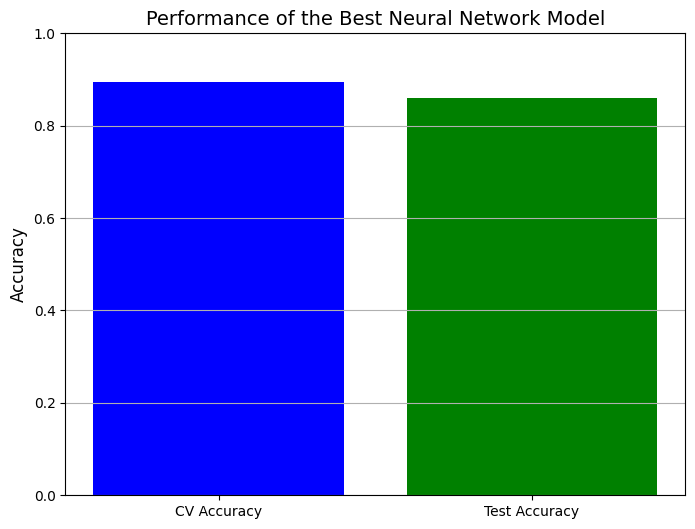

In [98]:
# Get best model test score and CV score
best_cv_score = random_search_nn.best_score_
test_score = model_nn_tuned.score(X_test_scaled_nn, y_test_nn)

# Plot comparison
plt.figure(figsize=(8, 6))
plt.bar(['CV Accuracy', 'Test Accuracy'], [best_cv_score, test_score], color=['blue', 'green'])
plt.title("Performance of the Best Neural Network Model", fontsize=14)
plt.ylabel("Accuracy", fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


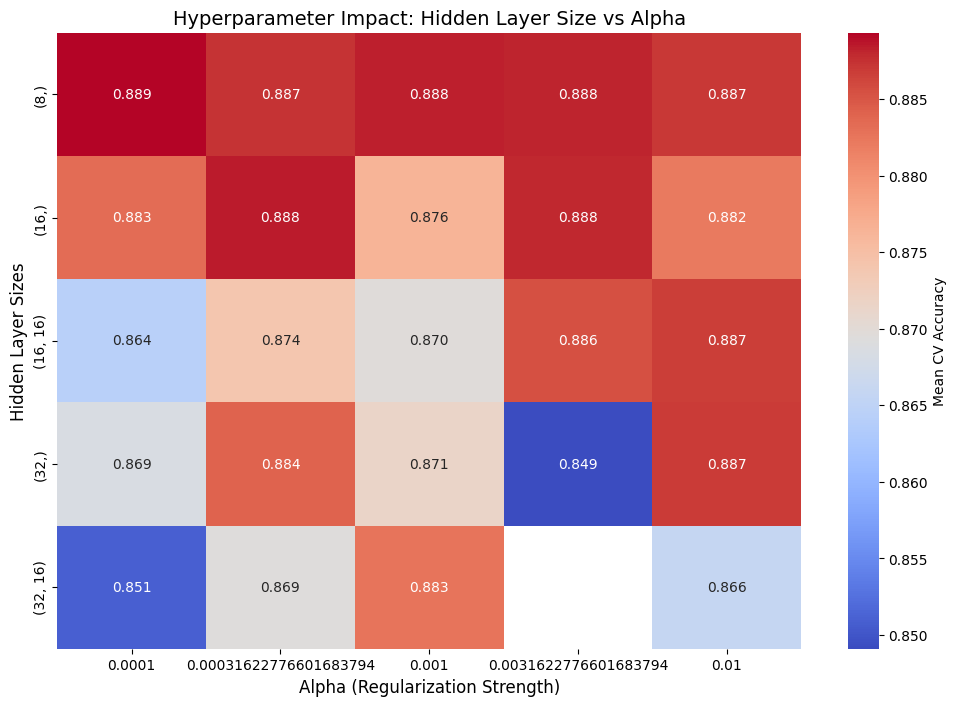

In [99]:
import seaborn as sns
import pandas as pd

# Extract results into a DataFrame
results_df = pd.DataFrame(random_search_nn.cv_results_)
heatmap_data = results_df.pivot_table(
    index='param_hidden_layer_sizes',
    columns='param_alpha',
    values='mean_test_score'
)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".3f", cmap='coolwarm', cbar_kws={'label': 'Mean CV Accuracy'})
plt.title("Hyperparameter Impact: Hidden Layer Size vs Alpha", fontsize=14)
plt.xlabel("Alpha (Regularization Strength)", fontsize=12)
plt.ylabel("Hidden Layer Sizes", fontsize=12)
plt.show()


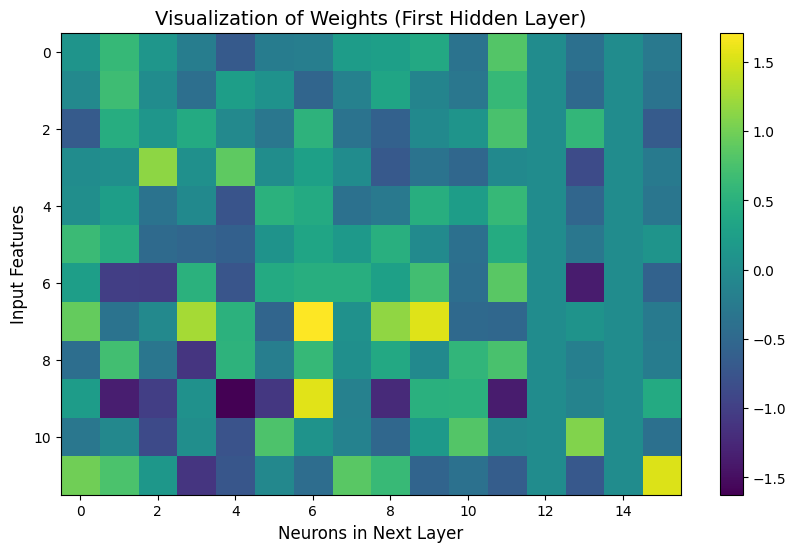

In [100]:
# Visualize weights of the first hidden layer
weights = model_nn_tuned.coefs_[0]  # Weights for the first layer

plt.figure(figsize=(10, 6))
plt.imshow(weights, cmap='viridis', aspect='auto')
plt.colorbar()
plt.title("Visualization of Weights (First Hidden Layer)", fontsize=14)
plt.xlabel("Neurons in Next Layer", fontsize=12)
plt.ylabel("Input Features", fontsize=12)
plt.show()


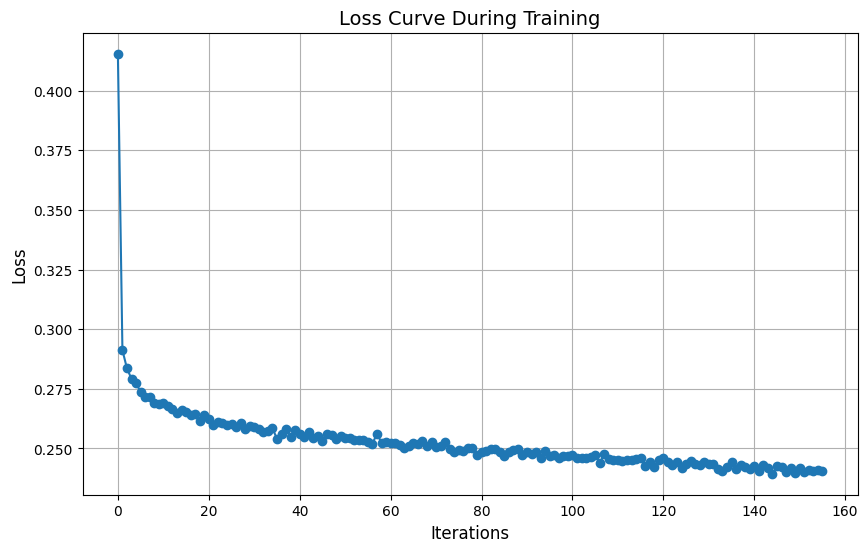

In [101]:
# Plot the loss curve
plt.figure(figsize=(10, 6))
plt.plot(model_nn_tuned.loss_curve_, marker='o')
plt.title("Loss Curve During Training", fontsize=14)
plt.xlabel("Iterations", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.grid()
plt.show()


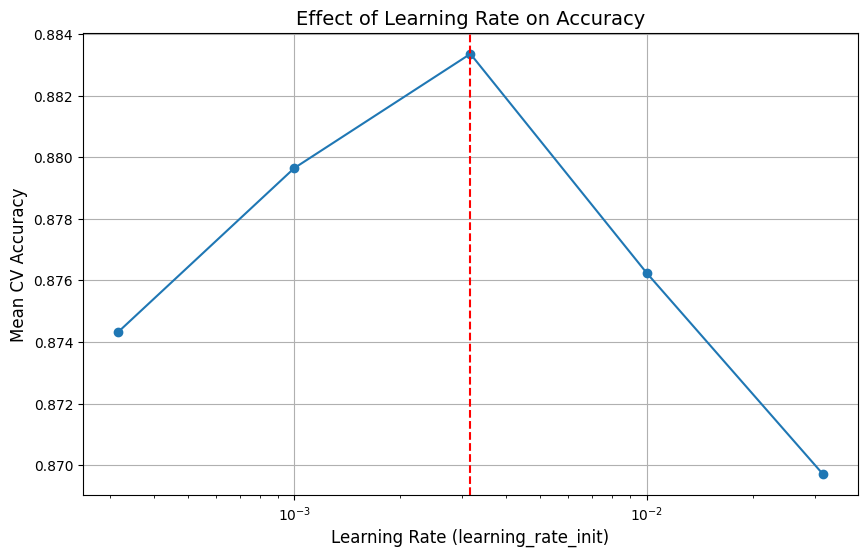

In [102]:
results = random_search_nn.cv_results_
learning_rates = params['learning_rate_init']
mean_test_scores_lr = [
    np.mean([results['mean_test_score'][i]
             for i in range(len(results['mean_test_score']))
             if results['param_learning_rate_init'][i] == lr])
    for lr in learning_rates
]

plt.figure(figsize=(10, 6))
plt.semilogx(learning_rates, mean_test_scores_lr, marker='o')
plt.axvline(random_search_nn.best_params_['learning_rate_init'], color='red', linestyle='--')
plt.title("Effect of Learning Rate on Accuracy", fontsize=14)
plt.xlabel("Learning Rate (learning_rate_init)", fontsize=12)
plt.ylabel("Mean CV Accuracy", fontsize=12)
plt.grid()
plt.show()


In [103]:
print("Classification Report for tuned neural network:")
print(f"Test Accuracy: {score_nn_tuned * 100:.2f}%")
print(classification_report(y_test_nn, model_nn_tuned.predict(X_test_scaled_nn)))

Classification Report for tuned neural network:
Test Accuracy: 86.00%
              precision    recall  f1-score   support

           0       0.85      0.88      0.86       251
           1       0.87      0.84      0.86       249

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500



In [ ]:
y_pred_test_test = model_nn_scaled.predict(X_test_scaled_nn)
print("Confusion Matrix for scaled neural network without tuning:")
print(classification_report(y_test_nn, y_pred_test_test))

Confusion Matrix for scaled neural network without tuning:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       251
           1       0.86      0.83      0.84       249

    accuracy                           0.85       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.85      0.85      0.85       500



## Section 9. Model performance summary

| Model                   | Initial Model Configuration | Modified Model Configuration | Initial Accuracy | Final Accuracy |
|-------------------------|-----------------------------|---------------------|-------------------|----------------|
| kNN                     | k = 3                        | Best k = 8                   | 85.20%                 | 86.8%              
| Logistic Regression     | default                   | {'C': 206.913808111479, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'sag'}                | 84.00%              | 85.40%
| Neural Networks            | default                     |   {'activation': 'relu', 'alpha': np.float64(3.1622776601683795e-05), 'batch_size': 8, 'hidden_layer_sizes': (32,), 'learning_rate_init': np.float64(0.0031622776601683794), 'max_iter': 2000, 'solver': 'adam'}                 | 90.1%                 | 90.1%              |


## Section 10. Insights and conclusions

### Insights
#### kNN Model
The initial kNN model, trained on scaled data, achieved a balanced accuracy of 85%, with precision, recall, and F1-scores for both classes averaging 0.85. While the model performed reasonably well, it demonstrated some limitations, particularly with false negatives in class 1 and false positives in class 0. To improve performance, hyperparameter tuning was performed using a grid search strategy, focusing on optimizing the number of neighbors. 

The tuning process identified 8 as the optimal number of neighbors, leading to the development of a better-performing kNN model. The tuned model improved the overall accuracy to 86.8%, with enhanced precision (0.90) and F1-score (0.87) for class 1 and improved recall (0.90) for class 0. These refinements reduced misclassifications for class 0, although a slight trade-off was observed in class 1 recall, showcasing the effectiveness of tuning in boosting overall model performance while balancing precision and recall across classes.

#### Logistic Regression Model
The initial logistic regression model achieved a balanced performance on the test set, with a precision, recall, and F1-score of 0.84 for both macro and weighted averages, and an overall accuracy of 84%. However, to enhance this performance, hyperparameter tuning was performed using a grid search strategy. 

After 10-fold cross-validation, the best configuration for the logistic regression model was a regularization strength of 206.91, 1,000 iterations, L2 regularization, and the "sag" optimization algorithm. The tuned model demonstrated improved accuracy on the test set (85.40%), with slightly enhanced precision, recall, and F1-scores for both classes, indicating a better balance in predicting both classes. The macro and weighted averages also improved to 0.85, reflecting a consistent boost in model performance.

#### Neural Network Model
The initial neural network model with a scaled test set achieved an accuracy of 85%, showcasing solid performance metrics (precision, recall, and F1-score of 0.85) and a balanced confusion matrix, indicating good predictive capabilities for both classes. However, there is still room for improvement which led to employing various tuning strategies.

The first round of tuning involved a randomized search to explore combinations of hyperparameters, including hidden layer configurations, activation functions, learning rates, and solvers. This process identified the best parameters, which included a single hidden layer of 16 neurons, a ReLU activation function, a learning rate of 0.00316, and a batch size of 16. The resulting model achieved an improved accuracy of 86%, with an F1-score of 0.86, indicating enhanced predictive performance.

Building on this progress, a more refined second tuning phase employed a grid search strategy. This iteration identified an architecture with a hidden layer of 32 neurons, a smaller batch size of 8, and extended training iterations to 2000. The learning rate and activation function remained consistent with the first tuned model. This advanced tuning pushed the test accuracy to 90.1%, marking a substantial improvement in the model's capability to generalize and accurately classify unseen data. This systematic tuning process underscores the importance of hyperparameter optimization in enhancing neural network performance.

### Conclusion
Theoretically, increasing the size of a dataset can theoretically enhance model performance by providing a more diverse and comprehensive range of examples, improving the model's ability to generalize to unseen data. For simpler datasets with fewer features, algorithms like k-Nearest Neighbors (kNN) or linear regression are often sufficient and computationally efficient. 

Meanwhile, as the complexity and dimensionality of the data increase, more sophisticated models like neural networks become necessary to capture intricate patterns. However, training neural networks on large datasets requires significant computational resources, including higher processing power, memory, and storage. In our models, the first NN model training took 0.2 seconds while our second NN model, training took 96 minutes...

For pumpkin seed classification, KNN and logistic regression, with accuracies of 86.8% and 85.4%, are acceptable, practical, and efficient solutions because they offer reliable performance with less computational demands. For those prioritizing more accuracy, neural networks may be the superior option. However, it is important to consider that the "best" model isn’t always the one with the highest performance metrics. Other factors, such as training time, computational resources, and the specific use case, play a role in determining the most suitable model.

For example, in the context of pumpkin seeds, the stakes are relatively low and misclassifying a seed is unlikely to have severe consequences. As such, simpler models like KNN or logistic regression may be more appropriate given their lower resource demands. Conversely, for high-stakes scenarios where precision is paramount (e.g. medical diagnosis or autonomous vehicle systems), a neural network model, with its superior accuracy, would be the clear choice despite the additional computational costs. Therefore, selecting the best model depends on balancing accuracy, efficiency, and the practical demands of the specific context.


## Section 11. References